# El precio justo

Hoy construimos una solución más compleja para estimar los precios de los bienes.

1. Cuaderno del día 2.0: crear una base de datos RAG con nuestros 400 000 datos de entrenamiento
2. Cuaderno del día 2.1: visualizar en 2D
3. Cuaderno del día 2.2: visualizar en 3D
4. Cuaderno del día 2.3: crear y probar una canalización RAG con GPT-4o-mini
5. Cuaderno del día 2.4: (a) recuperar nuestro tasador de Bosque aleatorio (b) crear un tasador de conjunto que permita contribuciones de todos los tasadores

¡Uf! ¡Eso es mucho para hacer en un día!

## TEN EN CUENTA:

Ya tenemos un estimador de productos muy poderoso con nuestro LLM patentado y perfeccionado. ¡La mayoría de las personas estarían muy satisfechas con eso! La razón principal por la que agregamos estos pasos adicionales es para profundizar su experiencia con RAG y con los flujos de trabajo de Agentic.

In [1]:
# imports

import os
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import numpy as np
import pickle
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from items import Item
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [2]:
# Es muy divertido subirlo a 400_000 y ver el conjunto de datos completo visualizado,
# pero casi hace que mi equipo se bloquee cada vez, ¡así que hazlo bajo tu propio riesgo! ¡10_000 es seguro!

MAXIMUM_DATAPOINTS = 30_000

In [3]:
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)

In [4]:
collection = client.get_or_create_collection('products')

In [5]:
CATEGORIES = ['Appliances', 'Automotive', 'Cell_Phones_and_Accessories', 'Electronics','Musical_Instruments', 'Office_Products', 'Tools_and_Home_Improvement', 'Toys_and_Games']
COLORS = ['red', 'blue', 'brown', 'orange', 'yellow', 'green' , 'purple', 'cyan']

In [6]:
# Prework
result = collection.get(include=['embeddings', 'documents', 'metadatas'], limit=MAXIMUM_DATAPOINTS)
vectors = np.array(result['embeddings'])
documents = result['documents']
categories = [metadata['category'] for metadata in result['metadatas']]
colors = [COLORS[CATEGORIES.index(c)] for c in categories]

In [7]:
# Probemos el gráfico en 2D

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
reduced_vectors = tsne.fit_transform(vectors)

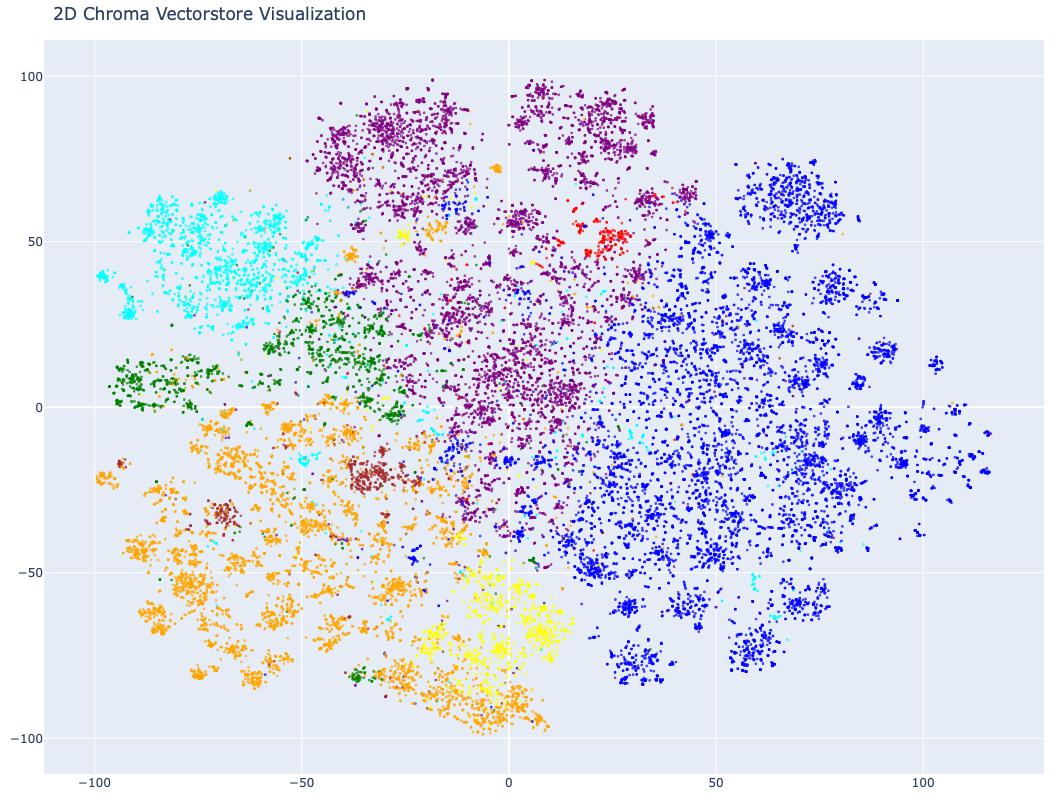

In [8]:

# Creamos el scatter plot en 2D
fig = go.Figure(data=[go.Scatter(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    mode='markers',
    marker=dict(size=3, color=colors, opacity=0.7),
)])

fig.update_layout(
    title='2D Chroma Vectorstore Visualization',
    scene=dict(xaxis_title='x', yaxis_title='y'),
    width=1200,
    height=800,
    margin=dict(r=20, b=10, l=10, t=40)
)

fig.show()